In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
dogs = pd.read_csv('./data/Dogs_NYC.csv')
dogs.head()

,dog_name,gender,breed,birth,dominant_color,secondary_color,third_color,spayed_or_neutered,guard_or_trained,borough,zip_code
0,Buddy,M,Afghan Hound,Jan-00,BRINDLE,BLACK,NaN,Yes,No,Manhattan,10003
1,Nicole,F,Afghan Hound,Jul-00,BLACK,NaN,NaN,Yes,No,Manhattan,10021
2,Abby,F,Afghan Hound,Nov-00,BLACK,TAN,NaN,Yes,No,Manhattan,10034
3,Chloe,F,Afghan Hound,Jan-02,WHITE,BLOND,NaN,Yes,No,Manhattan,10024
4,Jazzle,F,Afghan Hound,Oct-02,BLOND,WHITE,BLACK,Yes,No,Manhattan,10022


#### Assess missingness

In [30]:
print('Shape is ', dogs.shape)
dogs.isnull().sum()

Shape is  (81542, 11)


dog_name               4025
gender                   62
breed                     0
birth                     0
dominant_color          771
secondary_color       25528
third_color           64921
spayed_or_neutered        0
guard_or_trained          0
borough                   0
zip_code                  0
dtype: int64

#### Let's drop secondary_color and third_color since they have significant NaN values

In [31]:
dogs.drop(columns = ['secondary_color', 'third_color'], inplace = True)
dogs.head()

,dog_name,gender,breed,birth,dominant_color,spayed_or_neutered,guard_or_trained,borough,zip_code
0,Buddy,M,Afghan Hound,Jan-00,BRINDLE,Yes,No,Manhattan,10003
1,Nicole,F,Afghan Hound,Jul-00,BLACK,Yes,No,Manhattan,10021
2,Abby,F,Afghan Hound,Nov-00,BLACK,Yes,No,Manhattan,10034
3,Chloe,F,Afghan Hound,Jan-02,WHITE,Yes,No,Manhattan,10024
4,Jazzle,F,Afghan Hound,Oct-02,BLOND,Yes,No,Manhattan,10022


#### What shall we do about the missing values for name, dominant_color and gender?

In [32]:
#name - replace with "unknown"
dogs.dog_name.fillna("unknown", inplace = True)
dogs.head()

,dog_name,gender,breed,birth,dominant_color,spayed_or_neutered,guard_or_trained,borough,zip_code
0,Buddy,M,Afghan Hound,Jan-00,BRINDLE,Yes,No,Manhattan,10003
1,Nicole,F,Afghan Hound,Jul-00,BLACK,Yes,No,Manhattan,10021
2,Abby,F,Afghan Hound,Nov-00,BLACK,Yes,No,Manhattan,10034
3,Chloe,F,Afghan Hound,Jan-02,WHITE,Yes,No,Manhattan,10024
4,Jazzle,F,Afghan Hound,Oct-02,BLOND,Yes,No,Manhattan,10022


In [33]:
from collections import Counter
dog_colors = Counter(dogs.dominant_color)
dog_colors.most_common(5)

[('BLACK', 23578),
 ('WHITE', 18621),
 ('BROWN', 9181),
 ('TAN', 8942),
 ('BLOND', 4241)]

In [34]:
#dominant_color - replace with mode
dogs.dominant_color.fillna("BLACK", inplace = True)
dogs.head()

,dog_name,gender,breed,birth,dominant_color,spayed_or_neutered,guard_or_trained,borough,zip_code
0,Buddy,M,Afghan Hound,Jan-00,BRINDLE,Yes,No,Manhattan,10003
1,Nicole,F,Afghan Hound,Jul-00,BLACK,Yes,No,Manhattan,10021
2,Abby,F,Afghan Hound,Nov-00,BLACK,Yes,No,Manhattan,10034
3,Chloe,F,Afghan Hound,Jan-02,WHITE,Yes,No,Manhattan,10024
4,Jazzle,F,Afghan Hound,Oct-02,BLOND,Yes,No,Manhattan,10022


In [35]:
#gender - it's hard to impute gender without introducing bias so we'll just mark them with "U" for unknown
dogs.gender.fillna("U", inplace = True)
dogs.head()

,dog_name,gender,breed,birth,dominant_color,spayed_or_neutered,guard_or_trained,borough,zip_code
0,Buddy,M,Afghan Hound,Jan-00,BRINDLE,Yes,No,Manhattan,10003
1,Nicole,F,Afghan Hound,Jul-00,BLACK,Yes,No,Manhattan,10021
2,Abby,F,Afghan Hound,Nov-00,BLACK,Yes,No,Manhattan,10034
3,Chloe,F,Afghan Hound,Jan-02,WHITE,Yes,No,Manhattan,10024
4,Jazzle,F,Afghan Hound,Oct-02,BLOND,Yes,No,Manhattan,10022


In [36]:
dogs.isnull().sum()

dog_name              0
gender                0
breed                 0
birth                 0
dominant_color        0
spayed_or_neutered    0
guard_or_trained      0
borough               0
zip_code              0
dtype: int64

#### Let's see how correlated our variables are with each other by plotting pair-wise scatterplots
https://seaborn.pydata.org/generated/seaborn.pairplot.html

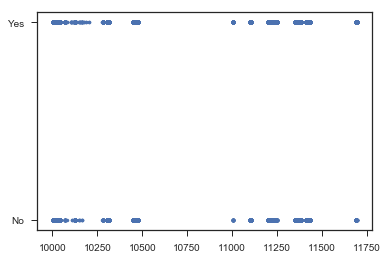

In [37]:
# import seaborn as sns
# sns.set(style="ticks", color_codes=True)
# sns.pairplot(data = dogs, diag_kind = 'kde')
# plt.show()

plt.plot(dogs.zip_code, dogs.spayed_or_neutered, marker = '.', linestyle = 'none')
plt.show()

#### All of our features need to be numeric - let's see how the string variables are distributed think about that

In [38]:
print('Name uniqueness: ', len(dogs.dog_name.unique()))
print('Breed uniqueness: ', len(dogs.breed.unique()))
print('Color uniqueness: ', len(dogs.dominant_color.unique()))
print('Borough uniqueness: ', len(dogs.borough.unique()))
print('Zipcode uniqueness: ', len(dogs.zip_code.unique()))

Name uniqueness:  13803
Breed uniqueness:  138
Color uniqueness:  19
Borough uniqueness:  5
Zipcode uniqueness:  225


In [39]:
cols_to_transform = ['breed', 'dominant_color', 'borough', 'zip_code']
dogs_dummied = pd.get_dummies(dogs, columns = cols_to_transform)
dogs_dummied.head()

,dog_name,gender,birth,spayed_or_neutered,guard_or_trained,breed_Afghan Hound,breed_Akita,breed_Akita Crossbreed,breed_American Eskimo dog,breed_American Pit Bull Mix / Pit Bull Mix,...,zip_code_11433,zip_code_11434,zip_code_11435,zip_code_11436,zip_code_11690,zip_code_11691,zip_code_11692,zip_code_11693,zip_code_11694,zip_code_11697
0,Buddy,M,Jan-00,Yes,No,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nicole,F,Jul-00,Yes,No,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abby,F,Nov-00,Yes,No,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chloe,F,Jan-02,Yes,No,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Jazzle,F,Oct-02,Yes,No,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#dropping name
dogs_dummied = dogs_dummied.drop(['birth','dog_name'], axis = 1)

#making guard_or_trained, spayed_or_neutered, and gender into 0/1 integer vals
dogs_dummied['gender'] = [0 if gender == 'M' else 1 for gender in dogs_dummied['gender']]
dogs_dummied['guard_or_trained'] = [0 if trained == 'No' else 1 for trained in dogs_dummied['guard_or_trained']]
dogs_dummied['spayed_or_neutered'] = [0 if fixed == 'No' else 1 for fixed in dogs_dummied['spayed_or_neutered']]

dogs_dummied.head()

,gender,spayed_or_neutered,guard_or_trained,breed_Afghan Hound,breed_Akita,breed_Akita Crossbreed,breed_American Eskimo dog,breed_American Pit Bull Mix / Pit Bull Mix,breed_American Pit Bull Terrier/Pit Bull,breed_American Staffordshire Terrier,...,zip_code_11433,zip_code_11434,zip_code_11435,zip_code_11436,zip_code_11690,zip_code_11691,zip_code_11692,zip_code_11693,zip_code_11694,zip_code_11697
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### We want to see if we can predict whether a dog is spayed or neutered - is that class balanced?

In [41]:
dogs_dummied.spayed_or_neutered.value_counts()

1    63502
0    18040
Name: spayed_or_neutered, dtype: int64

#### We could *always* predict the dog is spayed or neutered and we would be right about 78% of the time

#### Let's downsample the Yes group and build a logistic regression model - hopefully we can predict with > 78% accuracy!

In [42]:
from sklearn.utils import resample

#separate the classes
yes = dogs_dummied[dogs_dummied.spayed_or_neutered == 1]
no = dogs_dummied[dogs_dummied.spayed_or_neutered == 0]

#downsample the Yes group
downsampled_yes = resample(yes, replace = False, n_samples = 18040, random_state =42)

#put the downsampled yes dogs back with the no dogs and check the class counts again
balanced_dogs = pd.concat([downsampled_yes, no])

balanced_dogs.spayed_or_neutered.value_counts()

1    18040
0    18040
Name: spayed_or_neutered, dtype: int64

#### Import libraries for logistic regression and computing accuracy; create predictors without target (X) and target (y) datasets

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
X = balanced_dogs.drop('spayed_or_neutered', axis = 1)
y = balanced_dogs.spayed_or_neutered

#### Scaling the data creates a normalized transformation by removing the mean value of each feature and dividing by their standard deviations

In [45]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

#### Break into training data and testing data

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [135]:
#train a model
logistic_model = LogisticRegression().fit(X_train,y_train)

#predict on training set
predicted_y = logistic_model.predict(X_test) 

In [136]:
confusion_matrix(predicted_y, y_test, labels = [0, 1])

array([[3902, 1974],
       [2049, 3982]])

In [138]:
accuracy_score(predicted_y, y_test)

0.6621315192743764

In [139]:
print(classification_report(predicted_y, y_test))

             precision    recall  f1-score   support

          0       0.66      0.66      0.66      5876
          1       0.67      0.66      0.66      6031

avg / total       0.66      0.66      0.66     11907




By Walber - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=36926283

In [140]:
#get subset we think is most relevant
dogs_sub = dogs[['gender', 'borough', 'spayed_or_neutered', 'birth']]
dogs_sub.head()

,gender,borough,spayed_or_neutered,birth
0,M,Manhattan,Yes,Jan-00
1,F,Manhattan,Yes,Jul-00
2,F,Manhattan,Yes,Nov-00
3,F,Manhattan,Yes,Jan-02
4,F,Manhattan,Yes,Oct-02


In [141]:
year_list = []
for index, row in enumerate(dogs_sub.iterrows()):
    row_vals = row[1]
    if int(row_vals['birth'][-2:]) < 13:
        year_list.append(int('20' + row_vals['birth'][-2:]))
    else:
        year_list.append(int('20' + row_vals['birth'][-2:]) -100)

    
dogs['birth_year'] = [int(year) for year in year_list]

In [142]:
dogs_sub['birth_year'] = [int(year) for year in year_list]
dogs_sub.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,gender,borough,spayed_or_neutered,birth,birth_year
0,M,Manhattan,Yes,Jan-00,2000
1,F,Manhattan,Yes,Jul-00,2000
2,F,Manhattan,Yes,Nov-00,2000
3,F,Manhattan,Yes,Jan-02,2002
4,F,Manhattan,Yes,Oct-02,2002


In [143]:
dogs_sub['age'] = 2013 - dogs_sub.birth_year

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
dogs_sub.head()

,gender,borough,spayed_or_neutered,birth,birth_year,age
0,M,Manhattan,Yes,Jan-00,2000,13
1,F,Manhattan,Yes,Jul-00,2000,13
2,F,Manhattan,Yes,Nov-00,2000,13
3,F,Manhattan,Yes,Jan-02,2002,11
4,F,Manhattan,Yes,Oct-02,2002,11


In [145]:
#drop columns we no longer need
dogs_sub = dogs_sub.drop(['birth', 'birth_year'], axis = 1)
dogs_sub.head()


,gender,borough,spayed_or_neutered,age
0,M,Manhattan,Yes,13
1,F,Manhattan,Yes,13
2,F,Manhattan,Yes,13
3,F,Manhattan,Yes,11
4,F,Manhattan,Yes,11


In [146]:
#dogs_sub_dummied = dogs_sub.copy(deep = True)
cols_to_transform = ['borough']
dogs_sub_dummied = pd.get_dummies(dogs_sub, columns = cols_to_transform)

dogs_sub_dummied['gender'] = [0 if gender == 'M' else 1 for gender in dogs_sub_dummied['gender']]
dogs_sub_dummied['spayed_or_neutered'] = [0 if fixed == 'No' else 1 for fixed in dogs_sub_dummied['spayed_or_neutered']]

dogs_sub_dummied.head()

,gender,spayed_or_neutered,age,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
0,0,1,13,0,0,1,0,0
1,1,1,13,0,0,1,0,0
2,1,1,13,0,0,1,0,0
3,1,1,11,0,0,1,0,0
4,1,1,11,0,0,1,0,0


In [147]:
#create features and target data
X_sub = dogs_sub_dummied.drop('spayed_or_neutered', axis = 1)
y_sub = dogs_sub_dummied.spayed_or_neutered

#break into train/test
X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_sub, y_sub, test_size=0.33, random_state=42)

#train a model
logistic_model2 = LogisticRegression().fit(X_sub_train,y_sub_train)

#predict on training set
predicted_y2 = logistic_model2.predict(X_sub_test) 

In [148]:
accuracy_score(predicted_y2, y_sub_test)

0.78122561224869

In [149]:
#just guessing yes 63502/81542 = .77876431777
